# Proyecto del Día 12 - Análisis y Clasificación de Clientes

Bienvenido al **Proyecto del Día 12**. Lee atentamente la consigna *¡y a programar!*


### Título: Análisis y Clasificación de Clientes para Campañas de Marketing

En este proyecto, vas a aplicar técnicas avanzadas de análisis de datos para resolver un problema de clasificación de clientes en un conjunto de datos simulado.

El objetivo es identificar distintos segmentos de clientes basados en sus comportamientos de compra y características demográficas para diseñar campañas de marketing más efectivas.


### Descripción del Proyecto

Este proyecto tiene como objetivo utilizar técnicas de análisis de datos y aprendizaje automático para identificar diferentes segmentos de clientes basados en sus comportamientos de compra y características demográficas. Esto te permitirá desarrollar estrategias de marketing dirigidas y personalizadas. Vas a aplicar métodos de preprocesamiento de datos, reducción de dimensiones, y técnicas de clustering para analizar un conjunto de datos simulado de clientes.


### Datos

Vas a utilizar un dataset simulado llamado `datos_clientes.csv` que te descargarás en los recursos de esta lección, y que contiene información demográfica y de comportamiento de compra de clientes, como la edad, los ingresos anuales, la puntuación de gasto y la categoría de producto favorito.


### Consigna del Proyecto

1. **Preprocesamiento de Datos**: Cargar, limpiar y preparar el dataset para el análisis. Esto incluye la normalización de los datos para asegurar que las técnicas de reducción de dimensiones y clustering funcionen correctamente.
2. **Reducción de Dimensiones**: Utilizar **PCA** y **SVD** para reducir la cantidad de variables y destacar las características más importantes que influyen en el comportamiento del cliente.
3. **Clustering**: Implementar **K-Means** y **Clustering Jerárquico** para segmentar los clientes en grupos basados en similitudes en sus datos. Esto ayudará a identificar patrones y tendencias entre diferentes tipos de clientes.
4. **Visualización de Datos**: Crear visualizaciones para interpretar los resultados de las técnicas de reducción de dimensiones y clustering. Esto incluye la creación de **gráficos de dispersión** para los resultados de PCA y la visualización de **dendrogramas** para el Clustering Jerárquico.
5. **Interpretación y Estrategias de Marketing**: Analizar los clusters obtenidos y desarrollar propuestas de estrategias de marketing específicas para cada segmento de clientes. Deberás justificar tus estrategias basándote en las características y comportamientos de los grupos identificados.

¡Mucha suerte, y que te diviertas!

## Análisis y Clasificación de Clientes para Campañas de Marketing

### 1. Preprocesamiento de Datos

In [3]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
# load dataset
data=pd.read_csv(r"C:\Users\migue\OneDrive\Desktop\curso de data science\customer_data.csv")
non_norm_data=data
data

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica
...,...,...,...,...,...
195,196,69,77,99,Libros
196,197,30,86,36,Electrónica
197,198,58,65,82,Electrónica
198,199,20,43,96,Alimentos


In [5]:
# Basic data set info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# data set description
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [7]:
# data normalization 
scaler=MinMaxScaler() #initialization of function 
col_to_norm=[1,2,3] #setting columns for normalization
norm_col_data=scaler.fit_transform(data.iloc[:,col_to_norm])
data.iloc[:,col_to_norm]=norm_col_data #saving norm data in data df 
norm_data=data #renaming for clarity 
norm_data

C:\Users\migue\AppData\Local\Temp\ipykernel_20820\1681727748.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.74509804 1.         0.54901961 0.2745098  0.82352941 0.1372549
 0.39215686 0.74509804 0.35294118 0.43137255 0.19607843 0.19607843
 0.45098039 0.68627451 0.76470588 0.45098039 0.03921569 0.41176471
 0.01960784 0.45098039 0.84313725 0.56862745 0.7254902  0.01960784
 0.39215686 0.62745098 0.21568627 0.41176471 0.84313725 0.47058824
 0.94117647 0.50980392 0.80392157 0.52941176 0.29411765 0.2745098
 0.90196078 0.98039216 0.84313725 1.         0.03921569 0.70588235
 0.98039216 0.11764706 0.39215686 0.15686275 0.74509804 0.33333333
 0.05882353 0.47058824 0.25490196 0.96078431 0.15686275 0.49019608
 0.01960784 0.37254902 0.52941176 0.90196078 0.11764706 0.84313725
 0.1372549  0.90196078 0.66666667 0.25490196 0.31372549 0.68627451
 0.96078431 0.76470588 0.05882353 0.01960784 0.09803922 0.80392157
 0.05882353 0

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,0.745098,0.696970,0.469388,Libros
1,2,1.000000,0.717172,0.867347,Hogar
2,3,0.549020,0.262626,0.224490,Electrónica
3,4,0.274510,0.080808,0.663265,Libros
4,5,0.823529,0.616162,0.265306,Electrónica
...,...,...,...,...,...
195,196,1.000000,0.575758,1.000000,Libros
196,197,0.235294,0.666667,0.357143,Electrónica
197,198,0.784314,0.454545,0.826531,Electrónica
198,199,0.039216,0.232323,0.969388,Alimentos


### 2. Reducción de Dimensiones: PCA y SVD

In [14]:
# PCA

#covariables 
x=data.iloc[:,col_to_norm]

#response variable  
y=data.iloc[4]

pca=PCA(n_components=2)
principalcomponents=pca.fit_transform(x)
pcadf=pd.DataFrame(data=principalcomponents, columns=['PC1','PC2'])


In [16]:
#Interpretation of pcas 
pca.components_

array([[ 0.26253361,  0.73296361,  0.62756709],
       [ 0.82514248,  0.16662321, -0.5397931 ]])

We see that age  considerably  affects pc2 as well as income affects pc1

In [19]:
#substract different labels for data for later representation 
category=norm_data.columns[4]
category
lista=norm_data[category].unique()

In [21]:
# SVD method 
U, S, Vh = np.linalg.svd(norm_data.iloc[:,col_to_norm], full_matrices=True)


In [23]:
# Seleccionar los dos primeros componentes singulares para reducción de dimensiones
k = 2
X_svd = U[:, :k] * S[:k]
X_svd

array([[-1.10330752e+00,  1.94958469e-01],
       [-1.48923913e+00,  1.19624926e-01],
       [-5.95564956e-01,  2.41804440e-01],
       [-5.85524813e-01, -2.40904940e-01],
       [-9.82805427e-01,  3.94419253e-01],
       [-2.97569538e-01,  6.99136928e-02],
       [-1.31585958e+00, -3.78211175e-01],
       [-8.14164175e-01,  4.11453758e-01],
       [-6.43880335e-01,  1.59263686e-02],
       [-4.28625757e-01,  2.50987169e-01],
       [-8.21332900e-01, -1.93530667e-01],
       [-7.31991657e-01, -2.13133937e-01],
       [-6.63605201e-01,  5.69291120e-02],
       [-1.49464230e+00, -1.78609740e-01],
       [-1.19191448e+00,  2.30596951e-01],
       [-7.05920450e-01,  1.30660359e-01],
       [-9.60480457e-01, -6.77234107e-01],
       [-8.60340232e-01, -6.52166625e-02],
       [-4.54984799e-01, -1.84049510e-01],
       [-4.56698975e-01,  1.72645782e-01],
       [-7.75106549e-01,  5.20116472e-01],
       [-6.75783539e-01,  2.38584826e-02],
       [-4.59284738e-01,  4.98645303e-01],
       [-6.

### 3. Clustering: K-Means y Clustering Jerárquico

In [26]:
#  K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_cluters=kmeans.fit(x)



C:\Users\migue\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
centroides = kmeans.cluster_centers_
centroides

array([[0.48963585, 0.32842713, 0.19562682],
       [0.31490196, 0.29373737, 0.72653061],
       [0.62107843, 0.78106061, 0.62244898]])

In [30]:
etiquetas_kmeans = kmeans.labels_
etiquetas_kmeans

array([2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1,
       2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0,
       2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2,
       0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       1, 0])

In [32]:
# Aplicar Clustering Jerárquico
linked=linkage(x,method='ward')

### 4. Visualización de Datos

Text(0.5, 1.0, 'All data pca plot')

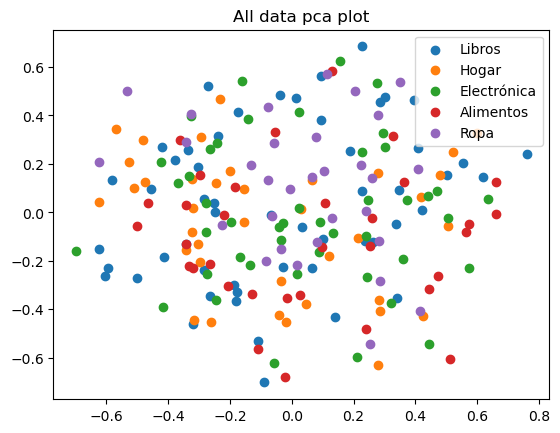

In [35]:
#representation for pca 
for item in lista: 
    plt.scatter(pcadf.iloc[:,0][norm_data['Categoría de Producto Favorito']==item],pcadf.iloc[:,1][norm_data['Categoría de Producto Favorito']==item], 
             mouseover=True)
plt.legend(lista, loc='best') 
plt.title('All data pca plot')

In [37]:
def plotpcas(item, row, col, color):
    axs[row,col].scatter(pcadf.iloc[:,0][norm_data['Categoría de Producto Favorito']==item],pcadf.iloc[:,1][norm_data['Categoría de Producto Favorito']==item], 
        mouseover=True, color=color)
   

Text(0.5, 0.98, 'PCA representation by category')

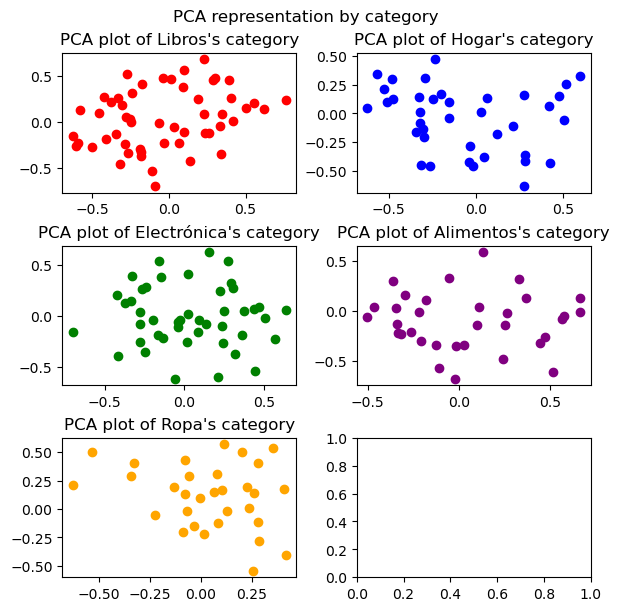

In [39]:
#lets do a representation for each category in 'categoría de producto favorito'
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(6,6),
                        layout="constrained")
row=0
col=0
color=["red", "blue", "green", "purple", "orange"]
colorindex=0

for item in lista:
    plotpcas(item, row, col, color=color[colorindex] )
    axs[row, col].set_title(f'PCA plot of {item}\'s category')
    colorindex+=1
    
    if col == 1:
        col=0
        row+=1
    else:
        col+=1
    
    
fig.suptitle('PCA representation by category')

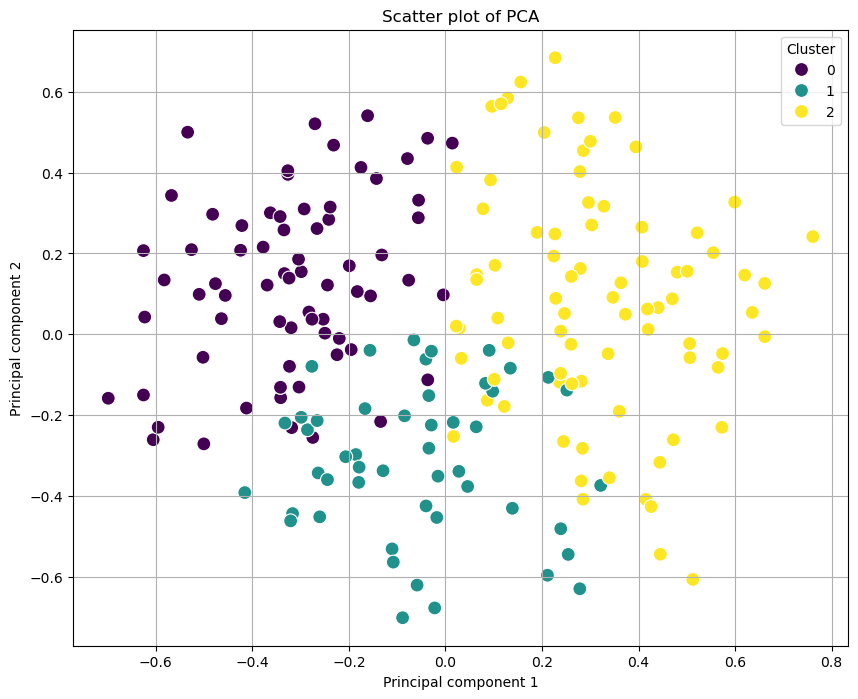

In [41]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pcadf.iloc[:,0], y=pcadf.iloc[:,1], hue=kmeans_cluters.labels_, palette='viridis', s=100)
plt.title('Scatter plot of PCA')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(title='Cluster')
plt.grid(True)


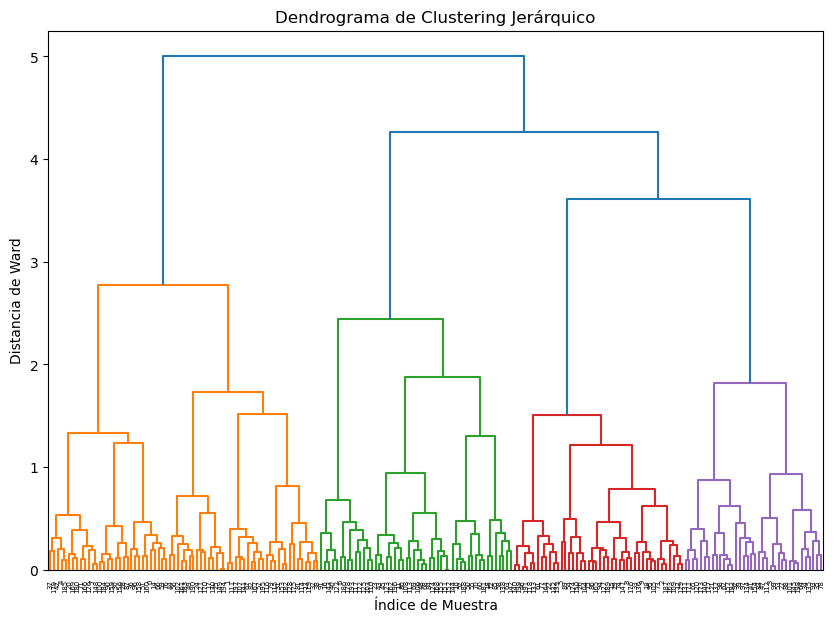

In [43]:
# Crear un dendrograma del clústering jerárquico
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia de Ward')
plt.axhline(y=10, color='r', linestyle='--');

### 5. Interpretación y Estrategias de Marketing basadas en los Clusters

In [46]:
# Escribe un loop que te permita mostrar los datos básicos de los diferentes clusters, como:
## su edad media
## sus ingresos medios
## su puntuación de gastos media

In [76]:
for item in range(0,3):
    age_mean=non_norm_data["Edad"][etiquetas_kmeans==item].mean()
    income_mean=non_norm_data["Ingresos Anuales (k$)"][etiquetas_kmeans==item].mean()
    expediture_mean=non_norm_data["Puntuación de Gasto (1-100)"][etiquetas_kmeans==item].mean()
    print("The age mean of cluster "+str(item +1)+" is "+ str(round(age_mean,2)))
    print("The income mean of cluster "+str(item +1)+" is "+str(round(income_mean,2)))
    print("The expenditure mean of cluster "+str(item + 1)+" is "+str(round(expediture_mean,2)))

The age mean of cluster 1 is 42.97
The income mean of cluster 1 is 52.51
The expenditure mean of cluster 1 is 20.17
The age mean of cluster 2 is 34.06
The income mean of cluster 2 is 49.08
The expenditure mean of cluster 2 is 72.2
The age mean of cluster 3 is 49.68
The income mean of cluster 3 is 97.32
The expenditure mean of cluster 3 is 62.0


In [ ]:
# Redacta una propuesta de estrategia de marketing para los diferentes clusters

For the first cluster, which is the has low tendency for spending money, as their income are the lowest among all clusters, is recommended to offer low price products. Probably as they are around 40 years old and their lives would be that of a family, marketing could use family scenes to catch their attention. 
For the second cluster, which is the youngest, brazen products that get the user out of their comfort zone and allow exploration of new experiences shall be recommended. Also they are the most prone to spend money, therfore high prices do not scare them. 
Lastly, the third cluster also spends plenty of money, therefore taking also in account their age mean, useful products that are meant to make life easier even if they are not economical should work. 